In [101]:
import json
import matplotlib.pyplot as plt
import statistics as stat

In [102]:
with open('../weights/p_date=2022-06-24-16_38_46/log.json', 'r') as f:
    data = json.load(f)
    
l = len(data["loss"])
print(f"{l} records")
print(data.keys())

17001 records
dict_keys(['loss', 'mae', 'mean_q', 'mean_eps', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [103]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ][-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ][-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }#if v <= mean_mean_q }

# Reward
episode_reward = { k: v for k, v in enumerate(data["episode_reward"]) if str(v) != "nan" }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [104]:
def plot(data, title, labelX, labelY):
    interval = 500
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(12,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(moving_average.keys(), moving_average.values(), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()

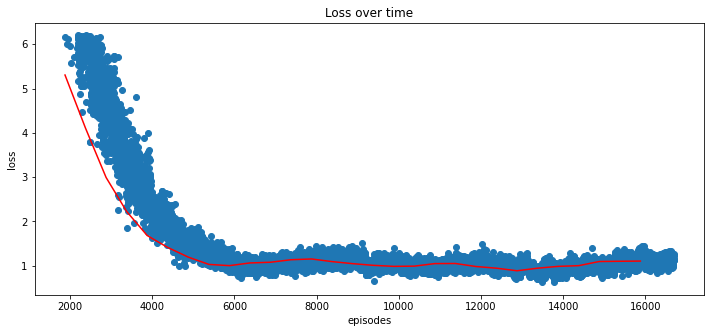

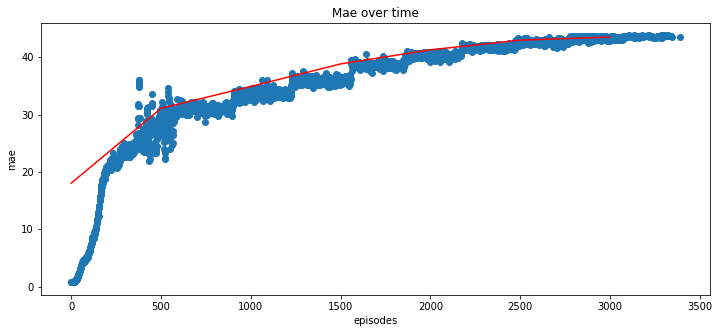

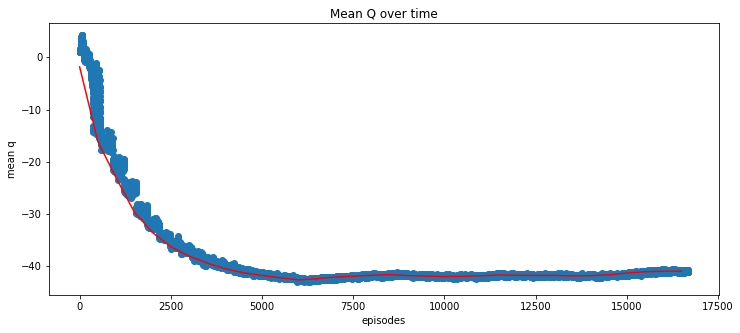

In [105]:
plot(loss_filtered, "Loss over time", "episodes", "loss")
plot(mae_filtered, "Mae over time", "episodes", "mae")
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

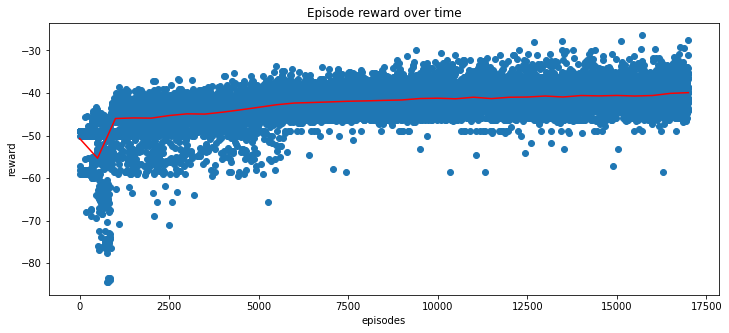

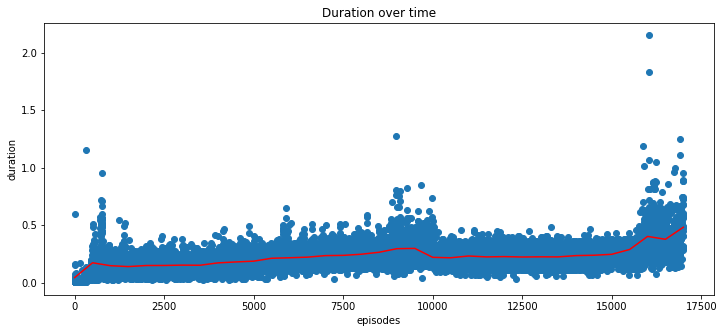

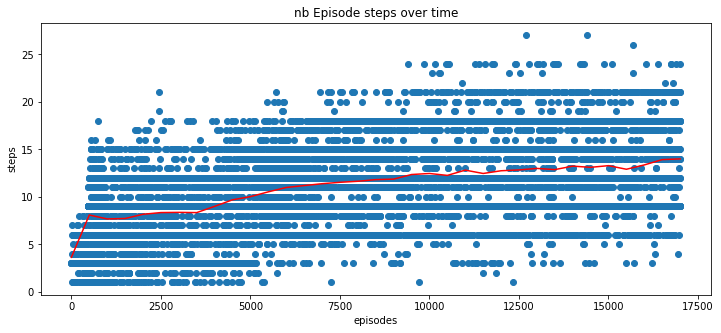

In [106]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")
plot(duration, "Duration over time", "episodes", "duration")
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")